# Zadanie 1
Proszę pobrać plik medicine.txt, zawierający wyniki analizy nowego leku. W dwóch pierwszych kolumnach znajduje się stężenie dwóch składników w próbce krwi, w trzeciej - informacja o tym, czy lek zadziałał. Dane nie są znormalizowane. Proszę znormalizować dane, podzielić je na zbiór uczący i testujący w proporcjach 80-20 (należy pamiętać o proporcjach klas), zaproponować wielowarstwową sieć neuronową i zbadać jej skuteczność dla różnych ilości warstw i neuronów w tych warstwach. Proszę narysować w jaki sposób sieć dokonała podziału w zbiorze dla kilku sieci (zarówno tych z dobrymi, jak i złymi wynikami) oraz jak wygląda poprawny podział zbioru. Proszę również przedstawić wyniki dla 5-8 różnych struktur sieci, wraz z oceną, która z nich najlepiej poradziła sobie z zadaniem klasyfikacji.



In [ ]:
import pandas as pd

medicine_data = pd.read_csv('medicine.txt')
print(medicine_data.head(5))
print(medicine_data.describe())

   Presence 1  Presence 2  Was medicine effective?
0     0.04609     6010.05                        0
1     0.02237     6119.66                        0
2     0.05054     7037.36                        0
3     0.03155     5009.20                        0
4     0.02256     6214.69                        0
        Presence 1    Presence 2  Was medicine effective?
count  1350.000000   1350.000000              1350.000000
mean      0.086185   4075.981393                 0.434074
std       1.290674   2457.984189                 0.495818
min       0.000000      0.000000                 0.000000
25%       0.009430   2021.677500                 0.000000
50%       0.029485   3865.360000                 0.000000
75%       0.046320   6112.425000                 1.000000
max      37.190000  29321.290000                 1.000000


Przeglądając dane można zauważyc duże odchylenie standardowe cech próbek krwi. Występują także wartości niestandardowe. Przed dalszą analizą danych należy zatem odfiltrować tzw. outlierów, a naastępnie dokonac normalizacji.

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# funkcja do usuwania wartości odstających przy użyciu IQR
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df >= lower_bound) & (df <= upper_bound)].dropna()
    return filtered_df


# usunięcie outlierów
filtered_data = remove_outliers(medicine_data.iloc[:, :-1])  # bierzemy pod uwage tylko cechy
filtered_data["Was medicine effective?"] = medicine_data.loc[filtered_data.index, "Was medicine effective?"]

# skalowanie danych
scaler = StandardScaler()
scaled_features = scaler.fit_transform(filtered_data.iloc[:, :-1])
scaled_data = pd.DataFrame(scaled_features, columns=filtered_data.columns[:-1])
scaled_data["Was medicine effective?"] = filtered_data["Was medicine effective?"].values

# podgląd wyniku wstępnej obróbki danych
print(scaled_data.head())
print(scaled_data.describe())


   Presence 1  Presence 2  Was medicine effective?
0    0.631560    0.826801                        0
1   -0.309818    0.874682                        0
2    0.808167    1.275566                        0
3    0.054510    0.389595                        0
4   -0.302277    0.916195                        0
        Presence 1    Presence 2  Was medicine effective?
count  1285.000000  1.285000e+03              1285.000000
mean      0.000000  3.096529e-16                 0.421790
std       1.000389  1.000389e+00                 0.494038
min      -1.197617 -1.798598e+00                 0.000000
25%      -0.875358 -8.706999e-01                 0.000000
50%      -0.077648  6.184884e-03                 0.000000
75%       0.512895  8.828163e-01                 1.000000
max       2.835382  2.565548e+00                 1.000000


In [ ]:
# wizualizacja decyzji modelu
def plot_decision_boundary(model, X, y, ax):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')



Activation: logistic, Layers: (1,), Accuracy: 0.8833, F1 score: 0.8598


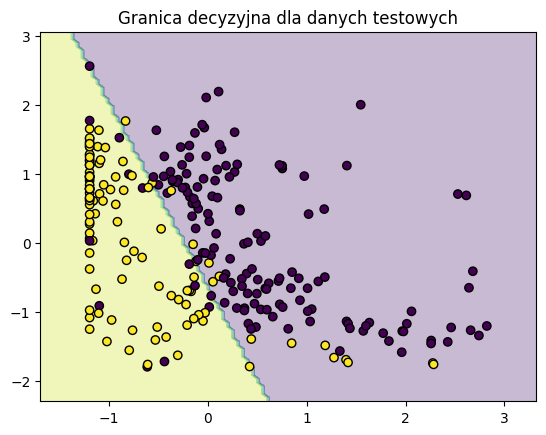

Activation: logistic, Layers: (5, 5), Accuracy: 0.8833, F1 score: 0.8598


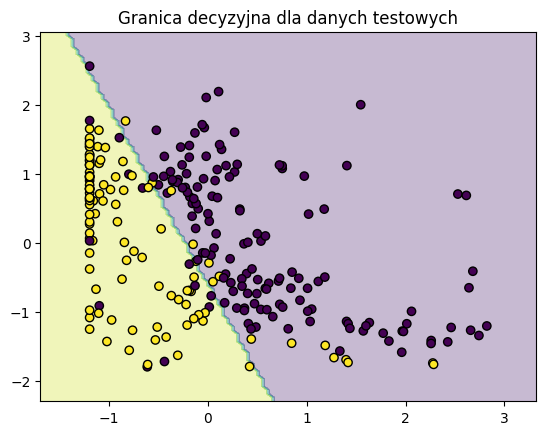

Activation: logistic, Layers: (10, 10), Accuracy: 0.8833, F1 score: 0.8598


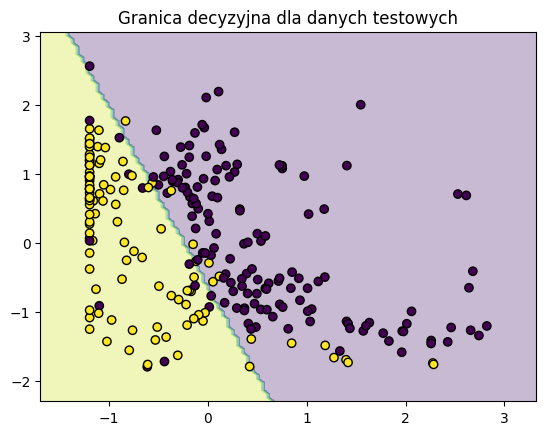

Activation: logistic, Layers: (20, 10, 5), Accuracy: 0.8872, F1 score: 0.8651


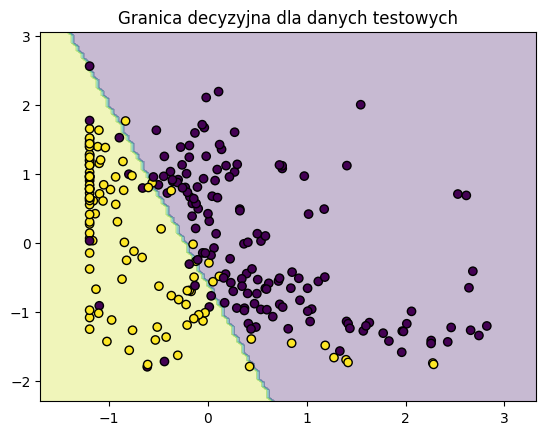

Activation: logistic, Layers: (30, 20, 10, 5), Accuracy: 0.8833, F1 score: 0.8598


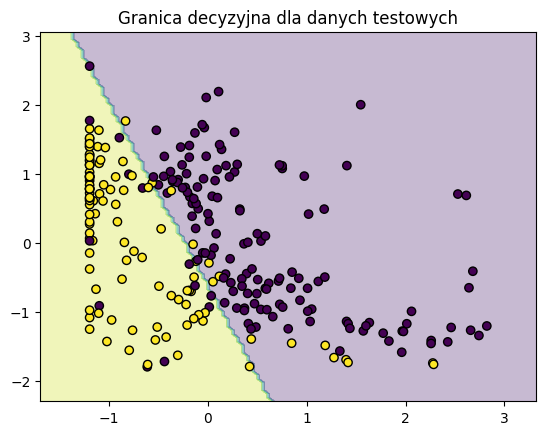

Activation: logistic, Layers: (50, 30, 20, 10, 5), Accuracy: 0.5798, F1 score: 0.0000


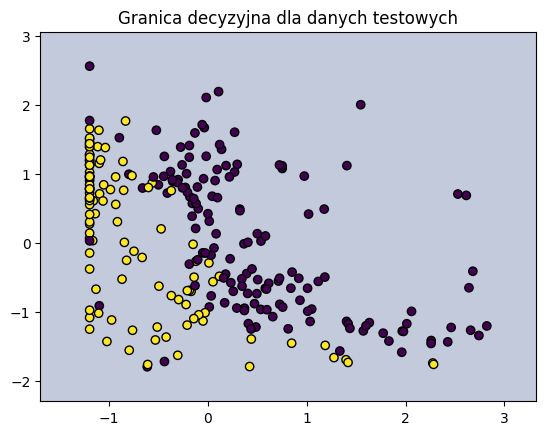

Activation: logistic, Layers: (100, 50, 30, 20, 10, 5), Accuracy: 0.5798, F1 score: 0.0000


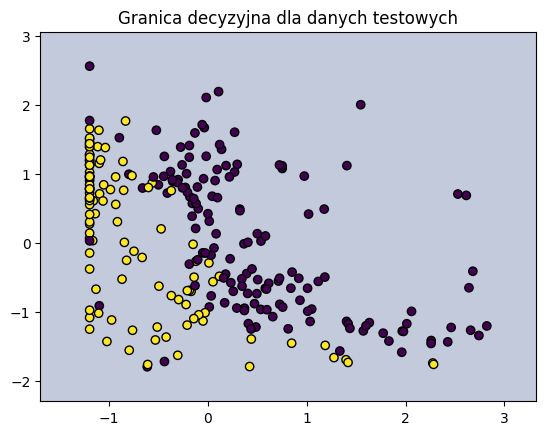

Activation: tanh, Layers: (1,), Accuracy: 0.8833, F1 score: 0.8598


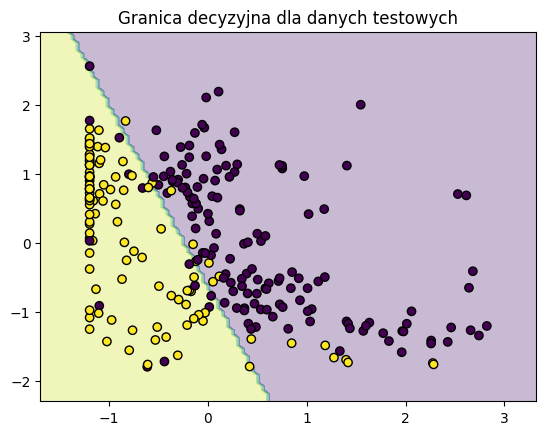

Activation: tanh, Layers: (5, 5), Accuracy: 0.8911, F1 score: 0.8716


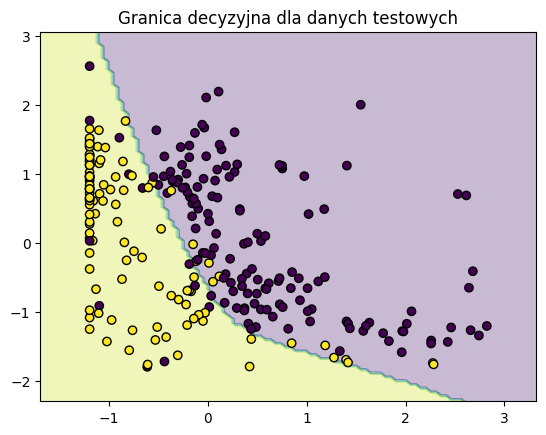

Activation: tanh, Layers: (10, 10), Accuracy: 0.9027, F1 score: 0.8848


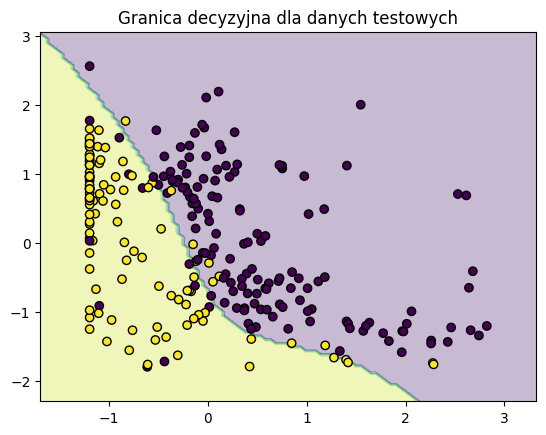

Activation: tanh, Layers: (20, 10, 5), Accuracy: 0.9105, F1 score: 0.8950


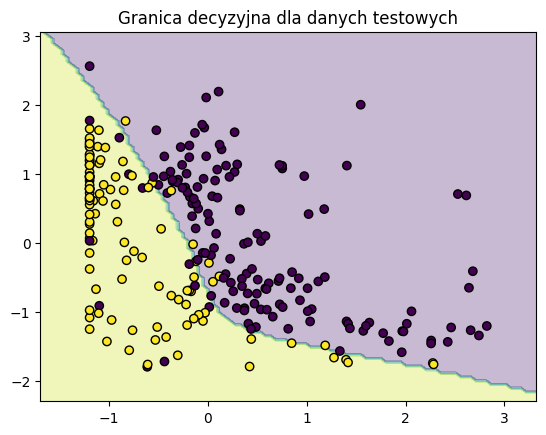

Activation: tanh, Layers: (30, 20, 10, 5), Accuracy: 0.9144, F1 score: 0.9000


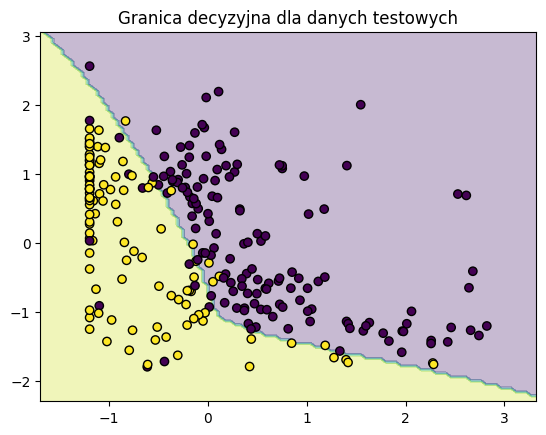

Activation: tanh, Layers: (50, 30, 20, 10, 5), Accuracy: 0.9066, F1 score: 0.8909


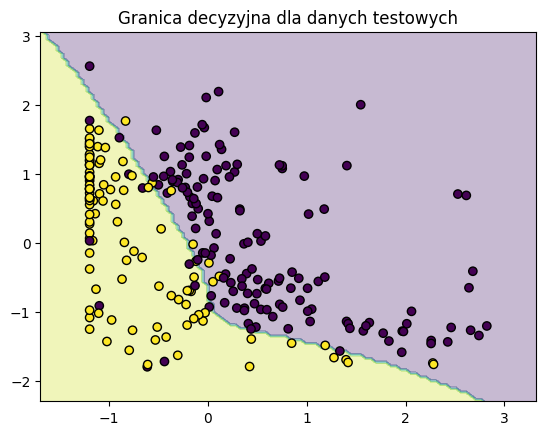

Activation: tanh, Layers: (100, 50, 30, 20, 10, 5), Accuracy: 0.9105, F1 score: 0.8950


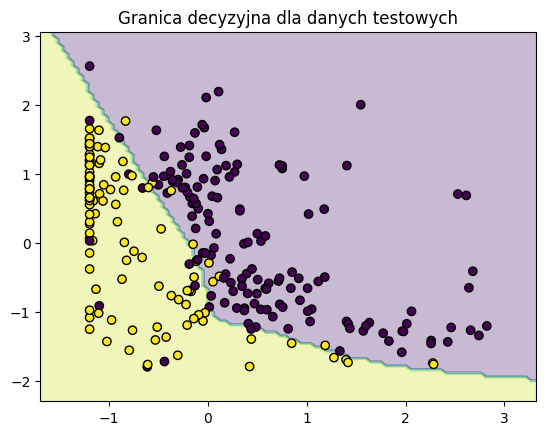

Activation: relu, Layers: (1,), Accuracy: 0.8833, F1 score: 0.8585


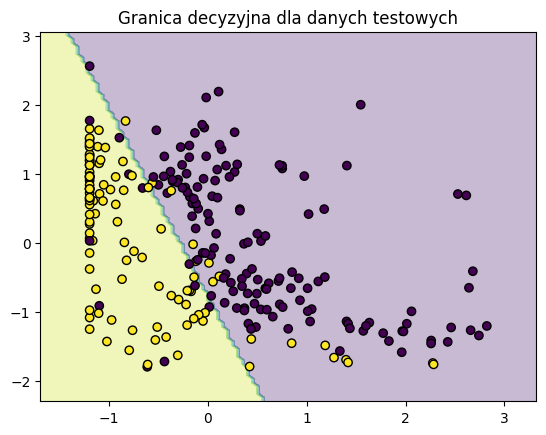

Activation: relu, Layers: (5, 5), Accuracy: 0.8833, F1 score: 0.8598


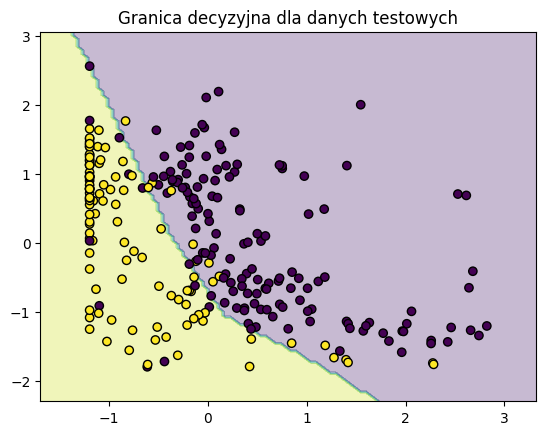

Activation: relu, Layers: (10, 10), Accuracy: 0.9066, F1 score: 0.8899


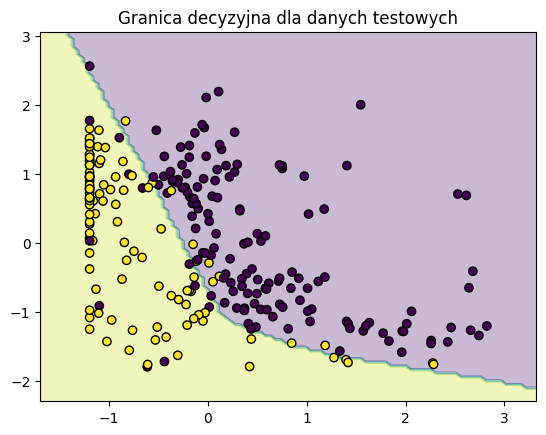

Activation: relu, Layers: (20, 10, 5), Accuracy: 0.8949, F1 score: 0.8789


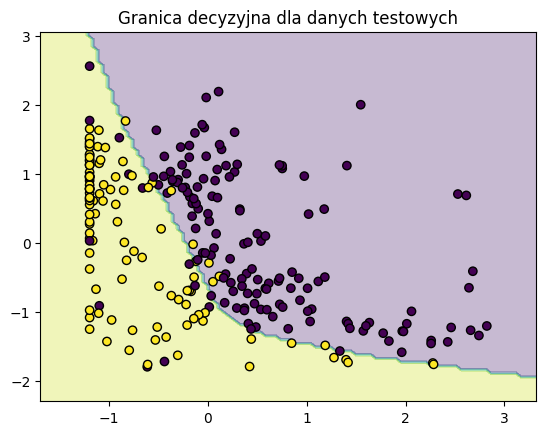

Activation: relu, Layers: (30, 20, 10, 5), Accuracy: 0.9144, F1 score: 0.9009


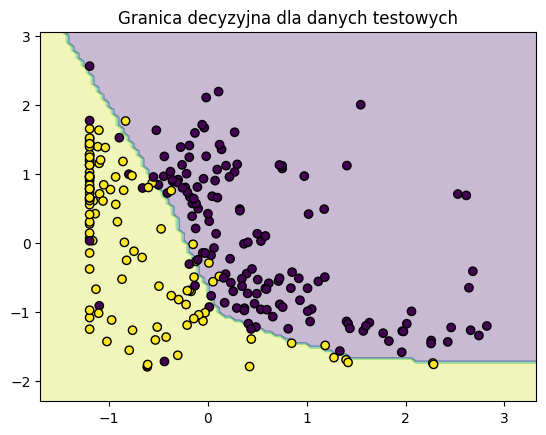

Activation: relu, Layers: (50, 30, 20, 10, 5), Accuracy: 0.9105, F1 score: 0.8969


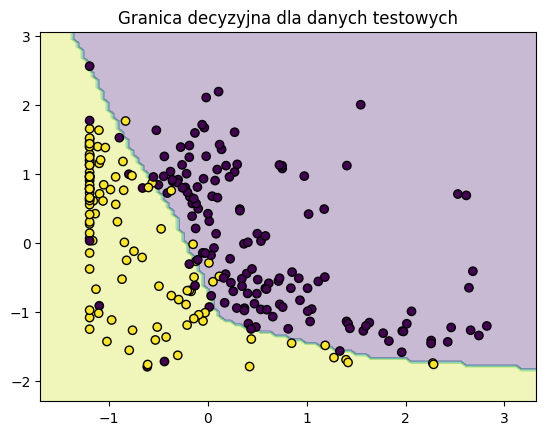

Activation: relu, Layers: (100, 50, 30, 20, 10, 5), Accuracy: 0.8988, F1 score: 0.8829


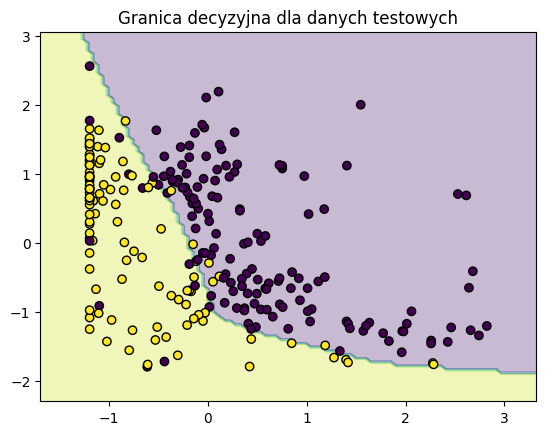

Activation: logistic, Layers: (1,), Accuracy: 0.8833, F1 score: 0.8598
Activation: logistic, Layers: (5, 5), Accuracy: 0.8833, F1 score: 0.8598
Activation: logistic, Layers: (10, 10), Accuracy: 0.8833, F1 score: 0.8598
Activation: logistic, Layers: (20, 10, 5), Accuracy: 0.8872, F1 score: 0.8651
Activation: logistic, Layers: (30, 20, 10, 5), Accuracy: 0.8833, F1 score: 0.8598
Activation: logistic, Layers: (50, 30, 20, 10, 5), Accuracy: 0.5798, F1 score: 0.0000
Activation: logistic, Layers: (100, 50, 30, 20, 10, 5), Accuracy: 0.5798, F1 score: 0.0000
Activation: tanh, Layers: (1,), Accuracy: 0.8833, F1 score: 0.8598
Activation: tanh, Layers: (5, 5), Accuracy: 0.8911, F1 score: 0.8716
Activation: tanh, Layers: (10, 10), Accuracy: 0.9027, F1 score: 0.8848
Activation: tanh, Layers: (20, 10, 5), Accuracy: 0.9105, F1 score: 0.8950
Activation: tanh, Layers: (30, 20, 10, 5), Accuracy: 0.9144, F1 score: 0.9000
Activation: tanh, Layers: (50, 30, 20, 10, 5), Accuracy: 0.9066, F1 score: 0.8909
Act

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# podział danych na zbiór uczący i testujący
X = scaled_data.iloc[:, :-1].values  # pierwsze dwie kolumny jako cechy
y = scaled_data.iloc[:, -1].values  # ostatnia kolumna jako etykieta
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# konfiguracje sieci neuronowych
activation_functions = ['logistic', 'tanh', 'relu']
hidden_layers_configs = [(1,), (5, 5), (10, 10), (20, 10, 5), (30, 20, 10, 5), (50, 30, 20, 10, 5), (100, 50, 30, 20, 10, 5)]

results = []

for activation in activation_functions:
    for layers in hidden_layers_configs:
        mlp = MLPClassifier(hidden_layer_sizes=layers, activation=activation, max_iter=1000, random_state=42)
        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        results.append((activation, layers, accuracy, f1))
        print(f"Activation: {activation}, Layers: {layers}, Accuracy: {accuracy:.4f}, F1 score: {f1:.4f}")
        fig, ax = plt.subplots()
        plot_decision_boundary(mlp, X_test, y_test, ax)
        ax.set_title("Granica decyzyjna dla danych testowych")
        plt.show()


for result in results:
  print(f"Activation: {result[0]}, Layers: {result[1]}, Accuracy: {result[2]:.4f}, F1 score: {result[3]:.4f}")


## Wnioski
*   Najlepszą skuteczność (accuracy i F1) osiągnęła sieć z konfiguracją warstw (30, 20, 10, 5) z funkcją aktywacji relu
*   Dla tego zbioru danych, przekroczenie pewnego progu ilości warstw i neuronów nie poprawia wynków, a w przypadku logistycznej funkcji aktywacji dochodzi do znacznego spadku skuteczności klasyfikacji
*   Zbyt duża ilość warstw i neuronów prowadzi do przetrernowania sieci
*   Użycie funkcji aktywacji tanh i relu prowadzi do uzyskania lepszych wyników

# Zadanie 2

Proszę pobrać zbiór ręcznie pisanych cyfr z https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits (można to zrobić funkcją datasets.load_digits() w sklearnie). Proszę sprawdzić skuteczność klasyfikacji na tym zbiorze za pomocą wielowarstwowej sieci neuronowej.

In [ ]:
from sklearn import datasets

digits = datasets.load_digits()

df = pd.DataFrame(digits["data"])
df["label"] = digits["target"]

print(df.head(5))

     0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  label  
0  6.0  13.0  10.0   0.0  0.0  0.0      0  
1  0.0  11.0  16.0  10.0  0.0  0.0      1  
2  0.0   3.0  11.0  16.0  9.0  0.0      2  
3  7.0  13.0  13.0   9.0  0.0  0.0      3  
4  0.0   2.0  16.0   4.0  0.0  0.0      4  

[5 rows x 65 columns]


Zbiór danych składa się z macierzowej reprezentacji bitmap 32x32 odręcznie napisanych cyfr (0-9).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score

X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Accuracy: {accuracy:.4f}, F1 score: {f1:.4f}")

Accuracy: 0.9778, F1 score: 0.9776


## Wnioski:
*   Zarówno wskaźnik accuracy, jak i F1 są na wysokim poziomie, wskazującym na skuteczność klasyfikacji bliską 100%
*   Świadczy to o tym, że sieć bardzo dobrze nauczyła się rozpoznawać cyfry na podstawie zbioru danych treningowych

# Zadanie 3

Proszę sprawdzić, jak zmieni się poprawność klasyfikacji na zbiorze ręcznie pisanych cyfr dla różnych architektur sieci, funkcji aktywacji, ilości epok uczenia i algorytmów uczenia. Proszę zbadać wpływ współczynnika uczenia (learning_rate) podczas używania algorytmu SGD. Dla najciekawszych przykładów proszę wypisać macierze pomyłek oraz wyliczyć wszystkie poznane metryki.

Testing parameters: {'hidden_layer_sizes': (128,), 'activation': 'relu', 'max_iter': 1000, 'solver': 'adam'}
Accuracy: 0.9722
F1-score: 0.9721
Precision: 0.9725
Recall: 0.9722
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        36
           1       0.92      0.94      0.93        36
           2       0.97      1.00      0.99        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       0.97      0.97      0.97        36
           7       0.97      1.00      0.99        36
           8       0.94      0.91      0.93        35
           9       0.97      0.97      0.97        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



<Figure size 800x600 with 0 Axes>

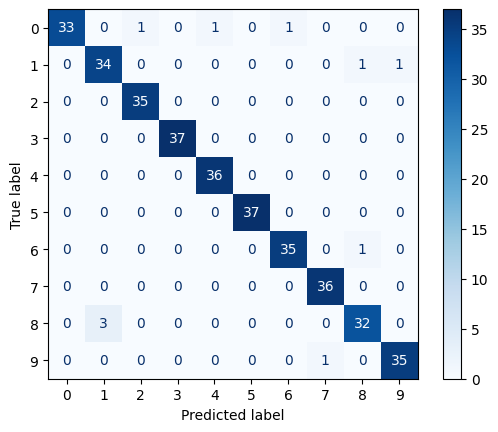


--------------------------------------------------------------------------------

Testing parameters: {'hidden_layer_sizes': (64, 64), 'activation': 'relu', 'max_iter': 1000, 'solver': 'adam'}
Accuracy: 0.9806
F1-score: 0.9804
Precision: 0.9815
Recall: 0.9806
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.92      1.00      0.96        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       0.95      1.00      0.97        36
           8       1.00      0.89      0.94        35
           9       0.97      0.94      0.96        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg

<Figure size 800x600 with 0 Axes>

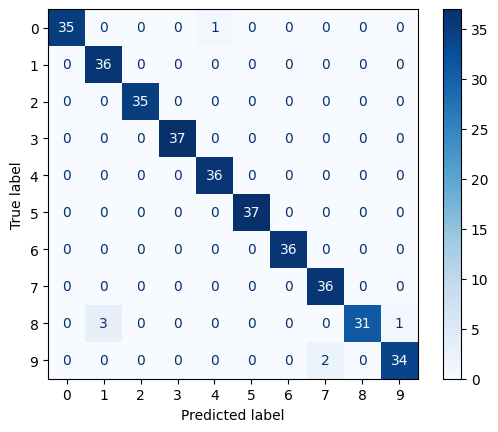


--------------------------------------------------------------------------------

Testing parameters: {'hidden_layer_sizes': (64, 64), 'activation': 'tanh', 'max_iter': 1000, 'solver': 'sgd', 'learning_rate_init': 0.01}
Accuracy: 0.9639
F1-score: 0.9636
Precision: 0.9649
Recall: 0.9639
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        36
           1       0.89      0.92      0.90        36
           2       0.97      1.00      0.99        35
           3       0.97      0.97      0.97        37
           4       0.95      1.00      0.97        36
           5       0.97      1.00      0.99        37
           6       0.97      1.00      0.99        36
           7       0.95      0.97      0.96        36
           8       1.00      0.86      0.92        35
           9       0.97      0.97      0.97        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      

<Figure size 800x600 with 0 Axes>

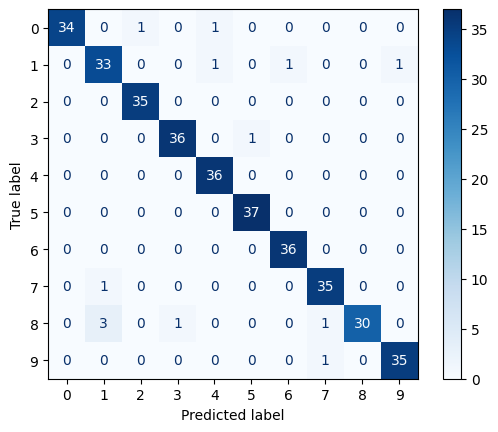


--------------------------------------------------------------------------------

Testing parameters: {'hidden_layer_sizes': (32, 32, 32), 'activation': 'tanh', 'max_iter': 1500, 'solver': 'sgd', 'learning_rate_init': 0.1}
Accuracy: 0.8667
F1-score: 0.8625
Precision: 0.8780
Recall: 0.8667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.85      0.64      0.73        36
           2       0.81      0.97      0.88        35
           3       0.73      1.00      0.84        37
           4       1.00      0.89      0.94        36
           5       0.92      0.92      0.92        37
           6       0.94      0.94      0.94        36
           7       0.86      1.00      0.92        36
           8       0.71      0.71      0.71        35
           9       0.95      0.58      0.72        36

    accuracy                           0.87       360
   macro avg       0.88      0.87   

<Figure size 800x600 with 0 Axes>

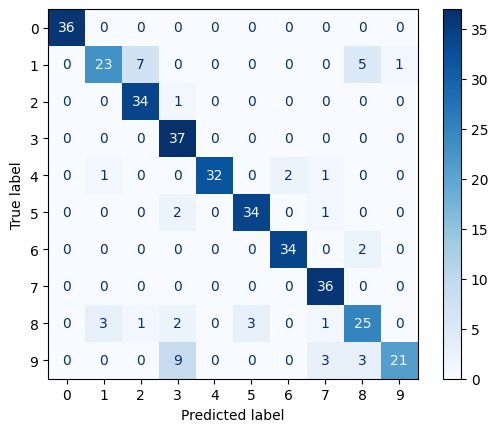


--------------------------------------------------------------------------------

Testing parameters: {'hidden_layer_sizes': (32, 32, 32), 'activation': 'tanh', 'max_iter': 1500, 'solver': 'sgd', 'learning_rate_init': 0.01}
Accuracy: 0.9472
F1-score: 0.9470
Precision: 0.9476
Recall: 0.9472
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.86      0.89      0.88        36
           2       0.92      0.94      0.93        35
           3       0.97      0.97      0.97        37
           4       0.95      1.00      0.97        36
           5       0.95      1.00      0.97        37
           6       1.00      0.97      0.99        36
           7       0.97      0.97      0.97        36
           8       0.88      0.83      0.85        35
           9       0.97      0.92      0.94        36

    accuracy                           0.95       360
   macro avg       0.95      0.95  

<Figure size 800x600 with 0 Axes>

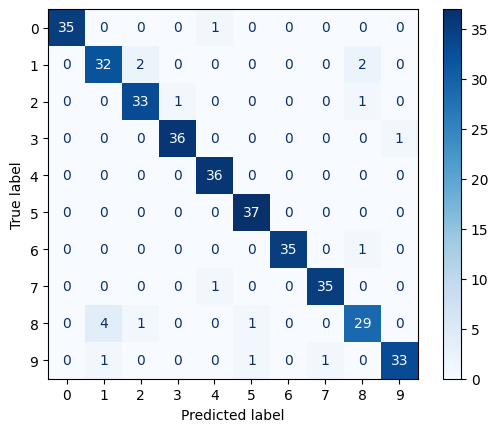


--------------------------------------------------------------------------------

Testing parameters: {'hidden_layer_sizes': (16, 16, 16, 16), 'activation': 'relu', 'max_iter': 2000, 'solver': 'adam'}
Accuracy: 0.9389
F1-score: 0.9393
Precision: 0.9415
Recall: 0.9389
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        36
           1       0.82      0.89      0.85        36
           2       0.89      0.97      0.93        35
           3       1.00      0.95      0.97        37
           4       0.90      1.00      0.95        36
           5       1.00      1.00      1.00        37
           6       1.00      0.94      0.97        36
           7       0.94      0.94      0.94        36
           8       0.91      0.86      0.88        35
           9       0.94      0.89      0.91        36

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weig

<Figure size 800x600 with 0 Axes>

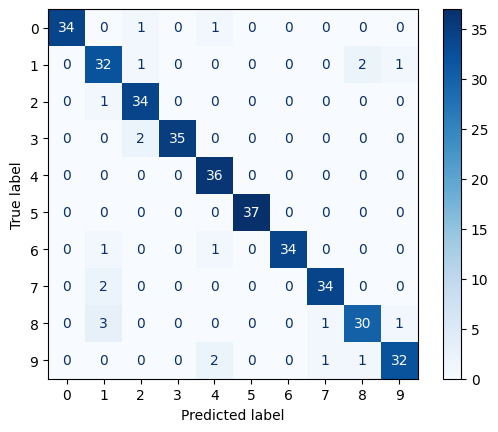


--------------------------------------------------------------------------------

Testing parameters: {'hidden_layer_sizes': (16, 16, 16, 16), 'activation': 'tanh', 'max_iter': 2000, 'solver': 'adam'}
Accuracy: 0.9139
F1-score: 0.9135
Precision: 0.9138
Recall: 0.9139
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.89      0.86      0.87        36
           2       0.94      0.86      0.90        35
           3       0.89      0.92      0.91        37
           4       0.92      0.97      0.95        36
           5       0.95      1.00      0.97        37
           6       0.97      0.97      0.97        36
           7       0.94      0.94      0.94        36
           8       0.74      0.74      0.74        35
           9       0.91      0.89      0.90        36

    accuracy                           0.91       360
   macro avg       0.91      0.91      0.91       360
weig

<Figure size 800x600 with 0 Axes>

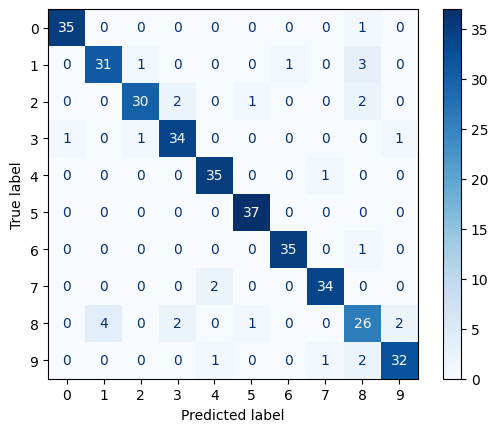


--------------------------------------------------------------------------------

Testing parameters: {'hidden_layer_sizes': (128, 64), 'activation': 'tanh', 'max_iter': 3000, 'solver': 'sgd', 'learning_rate_init': 0.001}
Accuracy: 0.9722
F1-score: 0.9720
Precision: 0.9725
Recall: 0.9722
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        36
           1       0.92      0.97      0.95        36
           2       0.95      1.00      0.97        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.94      0.86      0.90        35
           9       1.00      0.97      0.99        36

    accuracy                           0.97       360
   macro avg       0.97      0.97    

<Figure size 800x600 with 0 Axes>

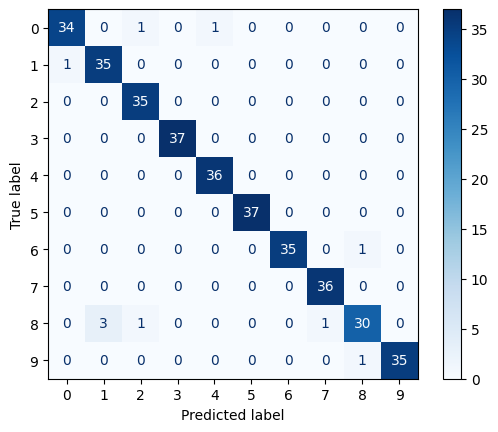


--------------------------------------------------------------------------------



In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

digits = datasets.load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

test_parameters = [
    {'hidden_layer_sizes': (128,), 'activation': 'relu', 'max_iter': 1000, 'solver': 'adam'},
    {'hidden_layer_sizes': (64, 64), 'activation': 'relu', 'max_iter': 1000, 'solver': 'adam'},
    {'hidden_layer_sizes': (64, 64), 'activation': 'tanh', 'max_iter': 1000, 'solver': 'sgd', 'learning_rate_init': 0.01},
    {'hidden_layer_sizes': (32, 32, 32), 'activation': 'tanh', 'max_iter': 1500, 'solver': 'sgd', 'learning_rate_init': 0.1},
    {'hidden_layer_sizes': (32, 32, 32), 'activation': 'tanh', 'max_iter': 1500, 'solver': 'sgd', 'learning_rate_init': 0.01},
    {'hidden_layer_sizes': (16, 16, 16, 16), 'activation': 'relu', 'max_iter': 2000, 'solver': 'adam'},
    {'hidden_layer_sizes': (16, 16, 16, 16), 'activation': 'tanh', 'max_iter': 2000, 'solver': 'adam'},
    {'hidden_layer_sizes': (128, 64), 'activation': 'tanh', 'max_iter': 3000, 'solver': 'sgd', 'learning_rate_init': 0.001},
]

for params in test_parameters:
    print(f"Testing parameters: {params}")
    mlp = MLPClassifier(**params, random_state=42)
    mlp.fit(X_train, y_train)

    y_pred = mlp.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_test, y_pred, average="weighted")
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    plt.figure(figsize=(8, 6))
    cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
    cm_disp.plot(values_format='d', cmap='Blues')
    plt.show()

    print("\n" + "-" * 80 + "\n")


## Wnioski:
*   Najlepiej sprawdziła się konfiguracja sieci (64, 64), czyli taka o mnjeszej ilości warstw, ale za to z większą ilością neuronów na warstwę
*   Wpływ współczynnika learning rate na algorytm uczenia SGD jest widoczny. Dla wartości współczynnika 0.1 dokładność wyniosła 0.8667, a dla współczynnika o wartości 0.1 była większa i wyniosła 0.9472. Zatem widać, że dla mniejszych "kroków" w procesie uczenia, algorytm jest w stanie bardziej zbliżyć się do poprawnego rozwiązania
*   Z macierzy pomyłek można odczytać, że powtarzającym się problemem jest mylenie przez sieć cyfry 1 z cyfrą 8

# Zadanie 4

Proszę pobrać zbiór yeast z UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Yeast). Proszę we własnym zakresie dokonać wstępnej analizy i przygotowania tego zbioru. Warto zauważyć, że liczności różnych klas wewnątrz zbioru są bardzo nierówne. Proszę spróbować osiągnąć jak najlepsze wyniki i narysować dla nich macierz pomyłek (dla zbioru uczącego i testującego) oraz wyliczyć wszystkie poznane do tej pory metryki. Czy dokładność na poziomie 0.5 dla takiego zbioru jest dobra? Mogą państwo zbadać też czas wykonywania funkcji fit dla różnych konfiguracji sieci.

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

# wczytanie danych
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data"
names = ['Sequence Name', 'Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Class']
data = pd.read_csv(url, names=names, delim_whitespace=True)

le = preprocessing.LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])

X = data.drop(['Sequence Name', 'Class'], axis=1)
y = data['Class']

# normalizacja cech
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# testowane konfiguracje sieci
test_parameters = [(50,), (100,), (200,), (50, 50), (100, 100), (200, 200), (100, 50, 25), (256, 128, 64)]
activation_functions = ['relu', 'tanh', 'logistic']

results = []

for activation in activation_functions:
    for params in test_parameters:
        mlp = MLPClassifier(hidden_layer_sizes=params, max_iter=20000, solver='sgd', activation=activation, random_state=42)

        start_time = time.time()
        mlp.fit(X_train, y_train)
        end_time = time.time()

        y_pred_train = mlp.predict(X_train)
        y_pred_test = mlp.predict(X_test)

        accuracy_test = accuracy_score(y_test, y_pred_test)
        f1_test = f1_score(y_test, y_pred_test, average="weighted")
        precision_test = precision_score(y_test, y_pred_test, average="weighted", zero_division=0)
        recall_test = recall_score(y_test, y_pred_test, average="weighted")
        cm_test = confusion_matrix(y_test, y_pred_test)

        accuracy_train = accuracy_score(y_train, y_pred_train)
        cm_train = confusion_matrix(y_train, y_pred_train)

        results.append({
            "Layers": params,
            "Activation": activation,
            "Accuracy Test": accuracy_test,
            "F1-score Test": f1_test,
            "Precision Test": precision_test,
            "Recall Test": recall_test,
            "Confusion Matrix Test": cm_test,
            "Accuracy Train": accuracy_train,
            "Confusion Matrix Train": cm_train,
            "Training Time": end_time - start_time
        })

# sortowanie wyników względem dokładności
top_results = sorted(results, key=lambda x: x["Accuracy Test"], reverse=True)[:3]

for idx, best in enumerate(top_results, 1):
    print(f"Najlepsza konfiguracja {idx}:")
    print(f"Warstwy: {best['Layers']}")
    print(f"Funkcja aktywacji: {best['Activation']}")
    print(f"Dokładność (Test): {best['Accuracy Test']:.4f}")
    print(f"F1-score (Test): {best['F1-score Test']:.4f}")
    print(f"Precyzja (Test): {best['Precision Test']:.4f}")
    print(f"Czułość (Test): {best['Recall Test']:.4f}")
    print(f"Macierz pomyłek (Test):\n{best['Confusion Matrix Test']}")
    print(f"Dokładność (Train): {best['Accuracy Train']:.4f}")
    print(f"Macierz pomyłek (Train):\n{best['Confusion Matrix Train']}")
    print(f"Czas trenowania: {best['Training Time']:.2f} s")
    print("\n" + "-" * 80 + "\n")


<ipython-input-1-e36f310a6ac0>:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, names=names, delim_whitespace=True)


## Wnioski
*   Najlepsze wyniki osiągnięte przez sieć są na poziomie accuracy 0.6
*   Najlepiej poradziła sobie konfiguracja TODO
*   Świadczy to o tym, że sieć ma trudności z poprawnym klasyfikowaniem danych
*   Wpływ na wynik ma prawodpodobnie nierównomierność liczności klas w zbiorze
*   Wyniki zbioru uczącego bywają lepsze od wyników zbioru testującego, co może świadczyć o przeuczeniu sieci, które skutkuje pogorszenie jej zdolności do klasyfikacji nowych danych


Wnioski: Analizując macierze pomyłek, widzimy, że model ma trudności z niektórymi
klasami. Na przykład, model często mylnie klasyfikuje klasę '1' jako '7'. Nierównomierność
liczności różnych klas w zbiorze danych jest prawdopodobnie jednym z czynników
wpływających na te trudności. Model osiąga lepsze wyniki na zbiorze treningowym niż na
zbiorze testowym. Może to wskazywać na overfitting, czyli zbyt mocne dopasowanie
modelu do danych treningowych kosztem jego zdolności do generalizacji na nowe dane.
Różne konfiguracje dają wyniki bliskie ~60%, co wskazuje że większe konfiguracje sieci
nie wpływają znacząco w tym przypadku na wynik